In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import matplotlib as mpl
import seaborn as sns 
import cmasher as cmr

In [32]:
#dir="/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch"
#file="MAG2P_nbonded-2025-2-6-16:25:37.pickle"
#dir="/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/MAG2P_nbonded-2025-2-14-19:59:9.pickle"
#dir="/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/MAG2P_nbonded-2025-3-4-18:34:52.pickle" 

dir = "/home/karner/Documents/github/MagneticParticles/rigid_magnetic/results/MAG2P_order_parameters-2025-5-5-19:38:49.pickle"
df = pd.read_pickle(dir)

print(df["lambda"].unique())

#eval_shifts = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
#mask = df['shift'].isin(eval_shifts)
#df = df[mask]

#eval_lambda = [2.0, 2.3, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0, 15.0, 17.0, 20.0, 25.0, 30.0, 35.0, 40.0, 50.0, 70.0, 100.0]
#mask = df['lambda'].isin(eval_lambda)
#df = df[mask]


df = df.sort_values(["lambda","shift"])   
bonds = df.groupby(["lambda","shift"])[["mean_bonds", "std_bonds"]].mean().reset_index()
radius =  df.groupby(["lambda","shift"])[["mean_radius_of_gyration","std_radius_of_gyration"]].mean().reset_index()
size =  df.groupby(["lambda","shift"])[["mean_size", "std_size"]].mean().reset_index()
largest =  df.groupby(["lambda","shift"])[["largest"]].mean().reset_index()
degree_60 = df.groupby(["lambda","shift"])[1.0053096491487339].mean().reset_index()
degree_0 = df.groupby(["lambda","shift"])[0.0].mean().reset_index()
degree_7 = df.groupby(["lambda","shift"])[0.12566370614359174].mean().reset_index()
degree_90 = df.groupby(["lambda","shift"])[1.5079644737231008].mean().reset_index()


[70.0 30.0 40.0 1.8 25.0 50.0 35.0 2.3 1.0 2.5 0.75 9.0 100.0 0.5 17.0
 1.25 1.5 10.0 8.0 3.0 20.0 7.0 1.75 6.0 12.0 4.0 2.0 1.9 3.5 5.0 15.0 4.5
 2.1]


In [ ]:
grouped = df.groupby(["lambda","shift"])[["mean_bonds", "std_bonds"]].mean().reset_index()
print(grouped)
print(df["shift"].unique())
print(df["lambda"].unique())


df.groupby(['lambda','shift']).size().reset_index().rename(columns={0:'count'})


     lambda  shift mean_bonds std_bonds
0       0.5   0.00      0.007  0.079619
1       0.5   0.05     0.0065  0.078987
2       0.5   0.10     0.0085   0.08124
3       0.5   0.15      0.007  0.081229
4       0.5   0.20     0.0055  0.072134
..      ...    ...        ...       ...
490   100.0   0.50    1.80625  0.746388
491   100.0   0.55    1.55875  0.604159
492   100.0   0.60     1.6415  0.546325
493   100.0   0.65    1.61325   0.54619
494   100.0   0.70    1.34575  0.590801

[495 rows x 4 columns]
[0.0 0.05 0.1 0.15 0.2 0.25 0.3 0.35 0.4 0.45 0.5 0.55 0.6 0.65 0.7]
[0.5 0.75 1.0 1.25 1.5 1.75 1.8 1.9 2.0 2.1 2.3 2.5 3.0 3.5 4.0 4.5 5.0
 6.0 7.0 8.0 9.0 10.0 12.0 15.0 17.0 20.0 25.0 30.0 35.0 40.0 50.0 70.0
 100.0]


,lambda,shift,count
0,0.5,0.00,8
1,0.5,0.05,8
2,0.5,0.10,8
3,0.5,0.15,8
4,0.5,0.20,8
...,...,...,...
490,100.0,0.50,8
491,100.0,0.55,8
492,100.0,0.60,8
493,100.0,0.65,8


In [23]:
df.columns

Index([                'file_id',                  'lambda',
                         'shift',              'mean_bonds',
                     'std_bonds',  'mean_second_neighbours',
         'std_second_neighbours',               'mean_size',
                      'std_size',                 'largest',
       'mean_radius_of_gyration',  'std_radius_of_gyration',
                             0.0,       0.12566370614359174,
             0.25132741228718347,        0.3769911184307752,
              0.5026548245743669,        0.6283185307179586,
              0.7539822368615504,        0.8796459430051422,
              1.0053096491487339,        1.1309733552923256,
              1.2566370614359172,        1.3823007675795091,
              1.5079644737231008,        1.6336281798666925,
              1.7592918860102844,         1.884955592153876,
              2.0106192982974678,        2.1362830044410597,
               2.261946710584651,         2.387610416728243,
              2.51327412

In [13]:

def heatmap(df,colormap):

    
    shifts = df["shift"].unique()
    lambdas=  df["lambda"].unique()
    mpl.rc("legend", fontsize=50)

    arr = df.values.astype(float)
    arr = np.reshape(arr[:,2], (len(lambdas), len(shifts)))
    arr = np.round(arr, decimals=2)

    fig, ax = plt.subplots(figsize=(10,10))
    im = sns.heatmap(
        arr,
        ax=ax,
        linewidth=1,
        annot=False,
        cmap=colormap,
        cbar=False,
        linecolor="black"
    )
    im.invert_yaxis()
    new_xticks = shifts
    new_yticks = lambdas
    ax.set_xticks(
        np.arange(0, len(shifts)),
        new_xticks,
        rotation=45,
        horizontalalignment="right",
    )
    ax.set_yticks(
        np.arange(0, len(lambdas)),
        new_yticks,
        rotation=0,
        verticalalignment="bottom",
    )
    im.set_ylabel("$\lambda$", size=20)
    im.set_xlabel("shift s", size=20)
    im.set_yticks(np.arange(0, len(lambdas)), new_yticks)
    im.tick_params(axis="both", which="major", labelsize=15)
    plt.tight_layout()

    mappable = im.get_children()[0]
    #plt.colorbar(mappable, ax=axes, orientation="horizontal")
    plt.colorbar(mappable, ax=ax, orientation="horizontal")
    plt.tight_layout()
    plt.show()



<>:37: SyntaxWarning: invalid escape sequence '\l'
<>:37: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_3909704/583275791.py:37: SyntaxWarning: invalid escape sequence '\l'
  im.set_ylabel("$\lambda$", size=20)


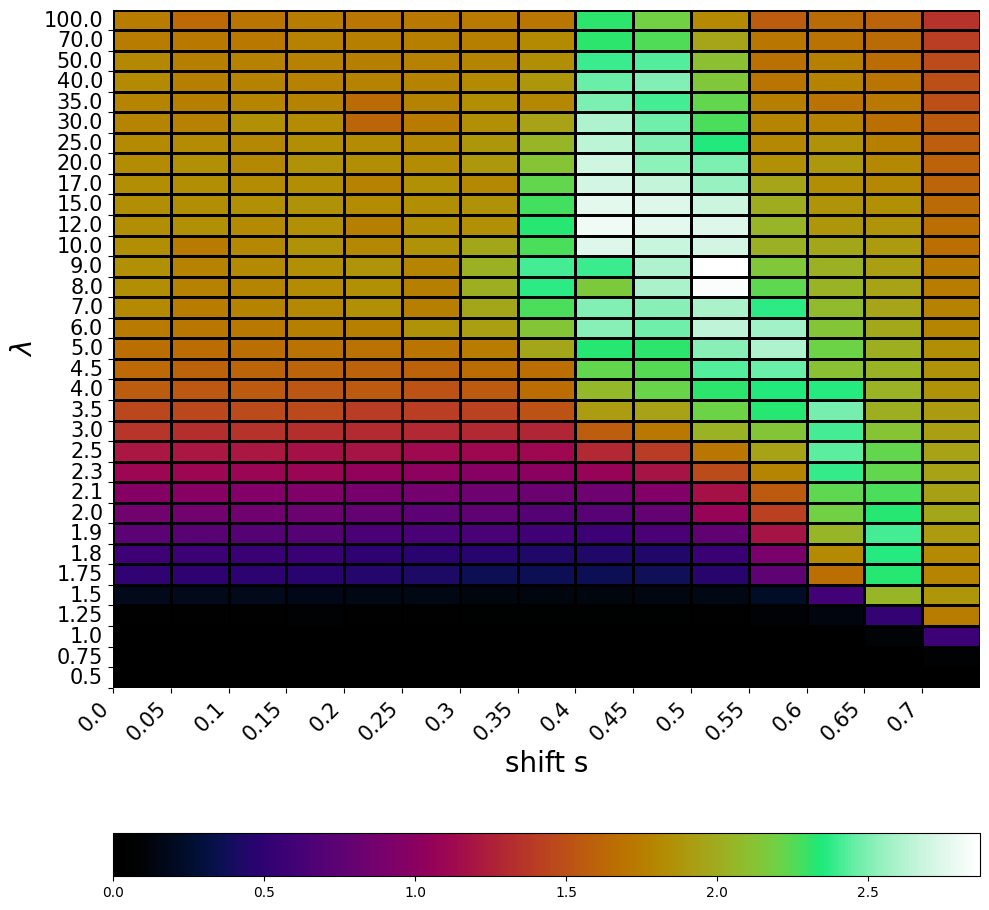

In [15]:

heatmap(bonds,cmr.chroma)

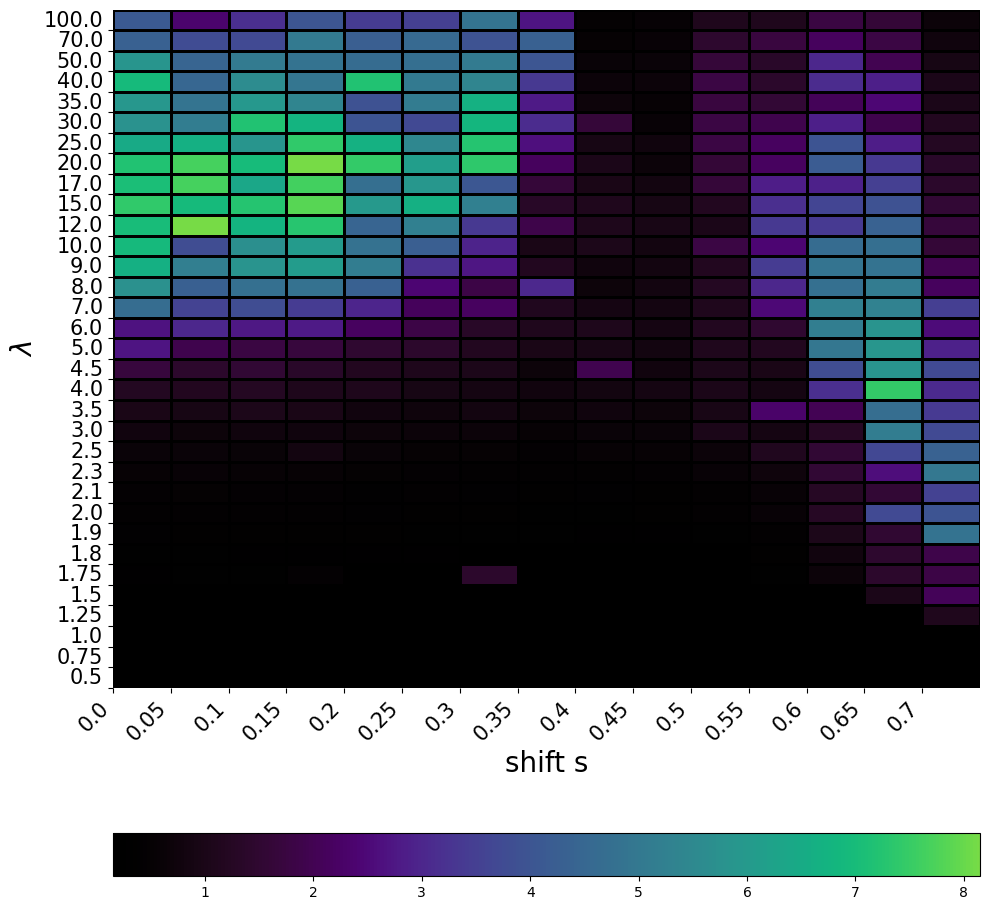

In [18]:

heatmap(radius,cmr.lavender)


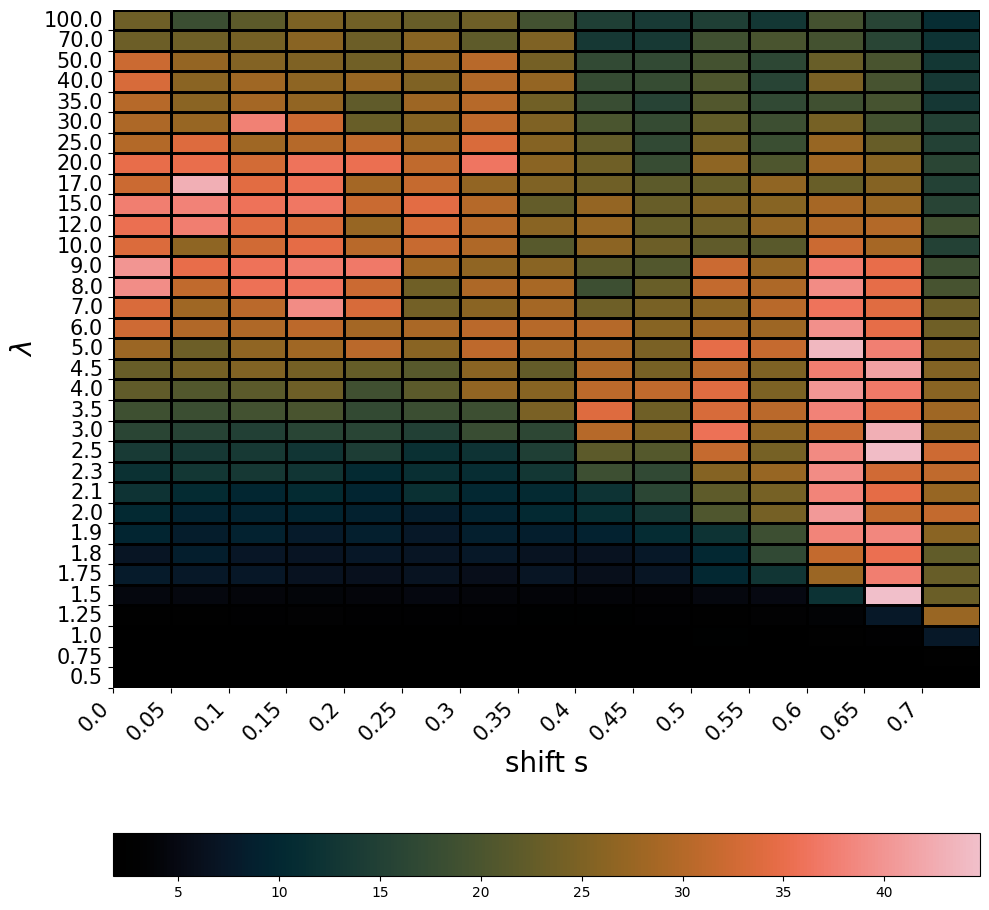

In [19]:
heatmap(largest,cmr.dusk)

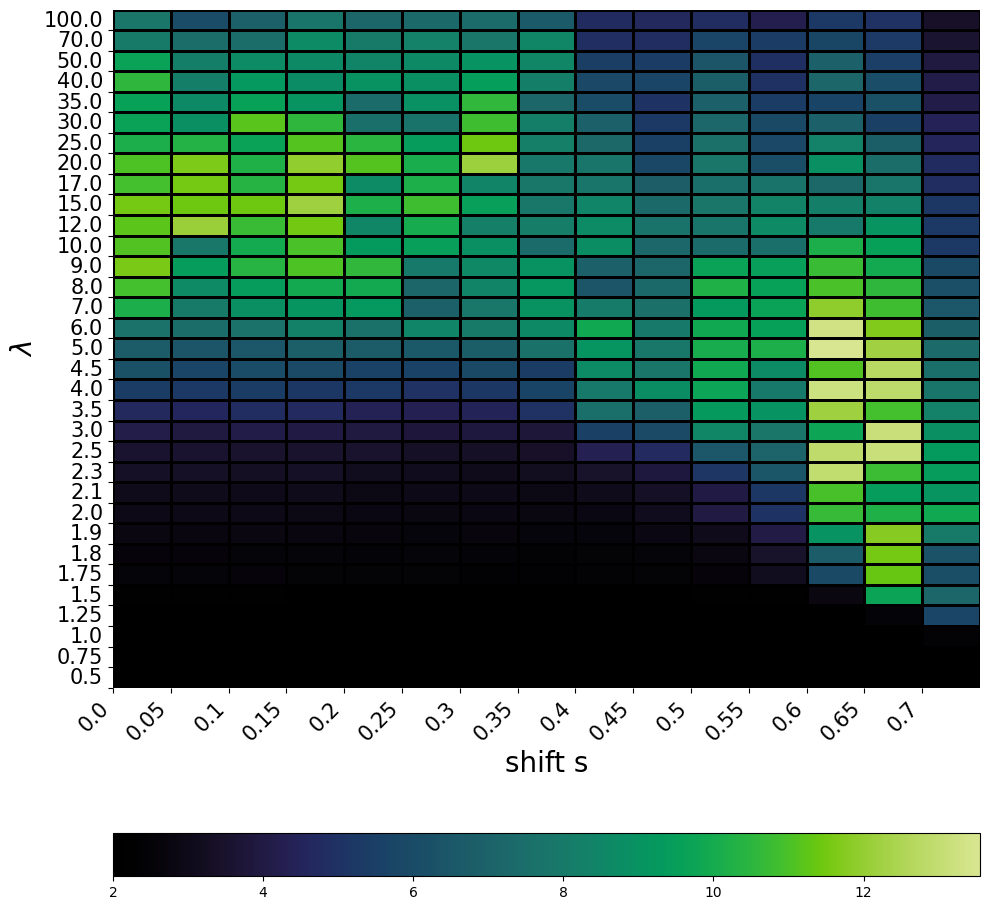

In [21]:
heatmap(size,cmr.toxic)

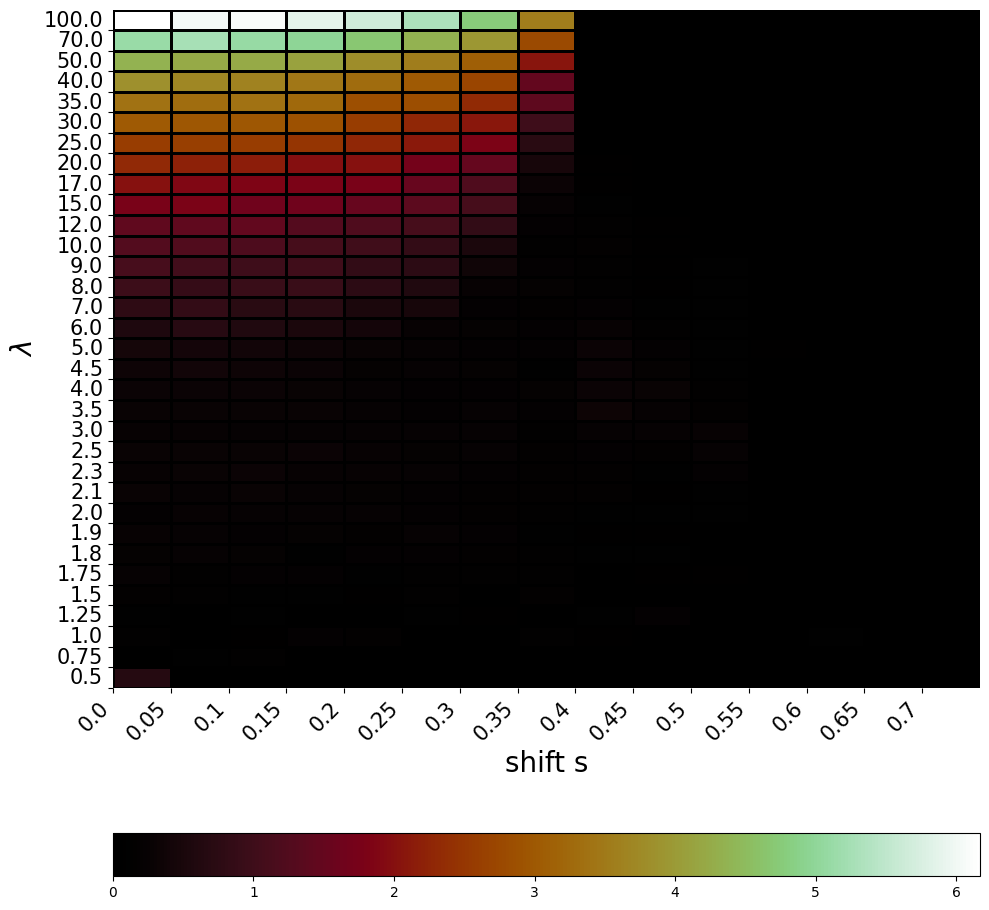

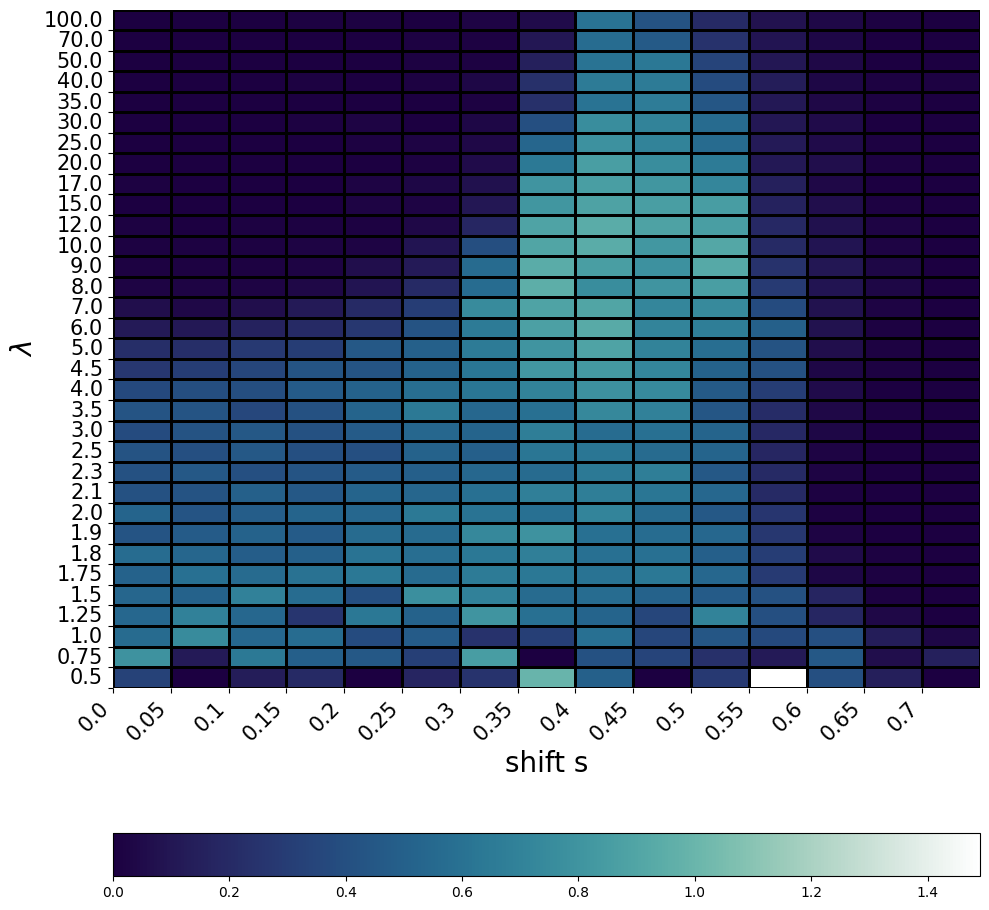

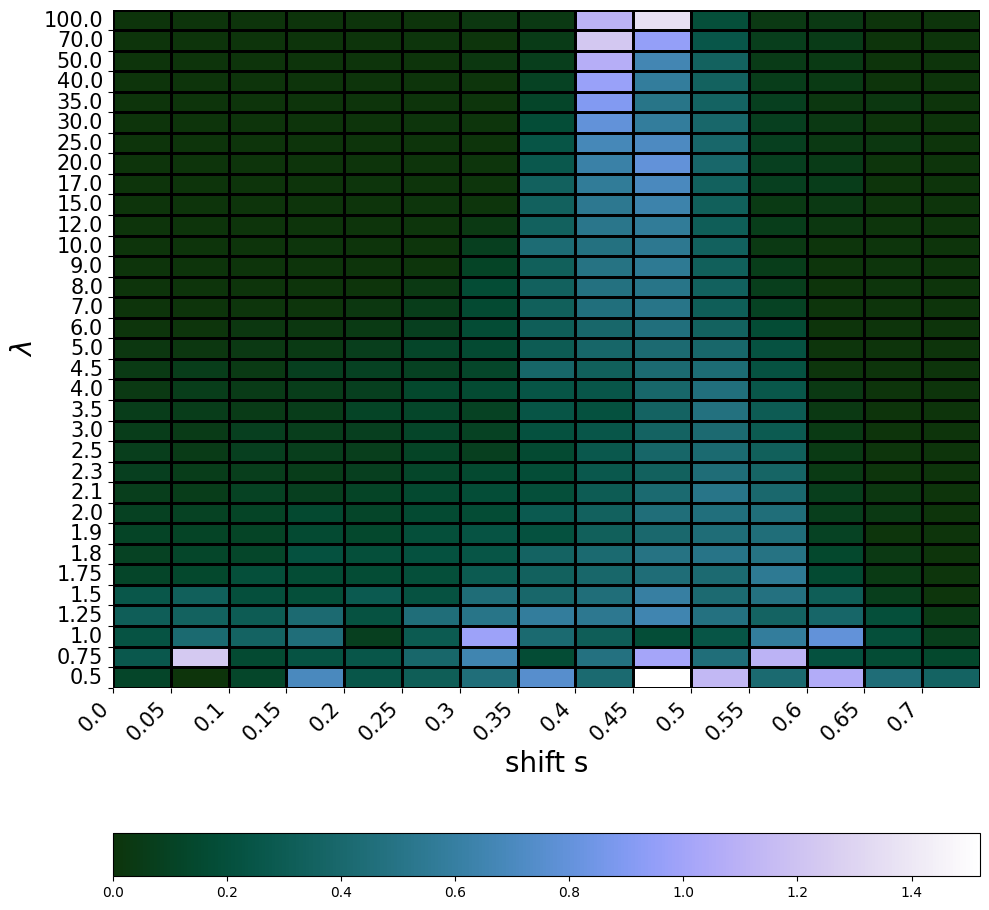

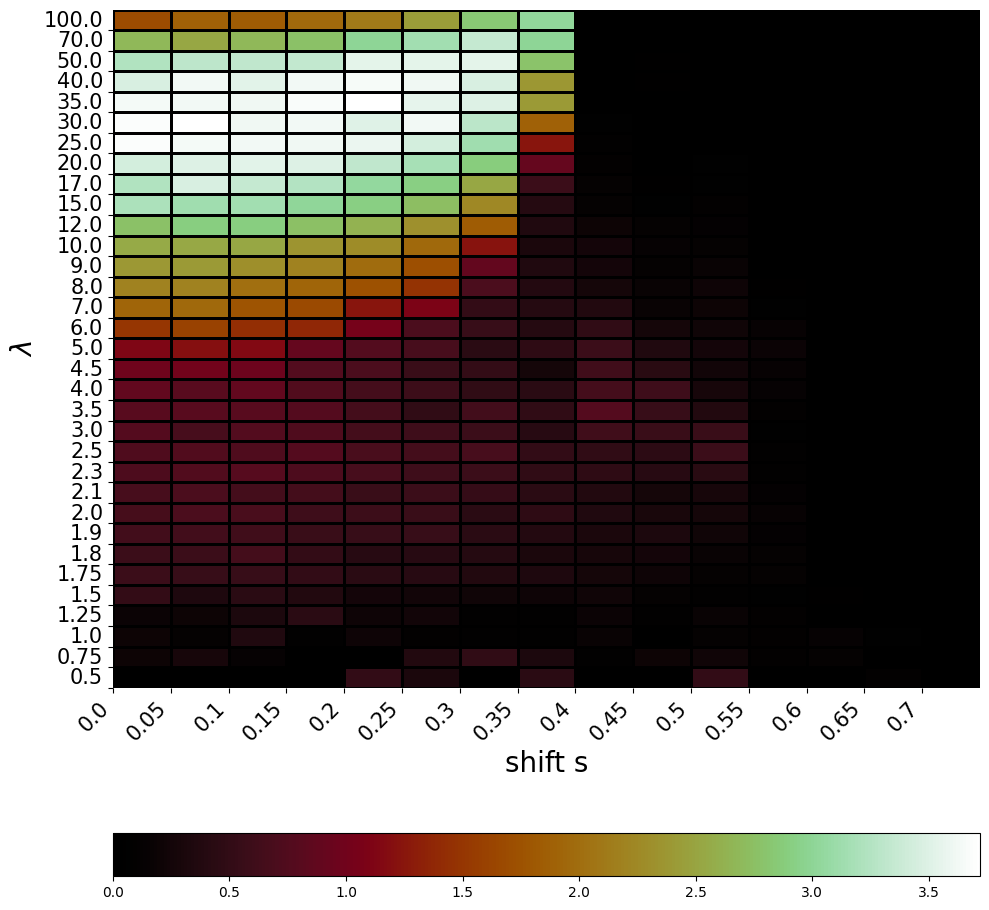

In [34]:
heatmap(degree_0,cmr.apple)

heatmap(degree_60,cmr.ocean)
heatmap(degree_90, cmr.horizon)
heatmap(degree_7,cmr.apple)

In [ ]:
heatmap(degree_0_plus,cmr.apple)

## Order parameter testing 

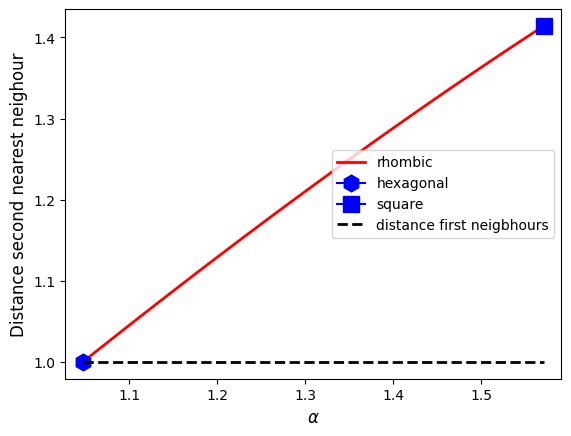

In [9]:
def rhombus_dshort(alpha):
    side_length = 1 
    dshort = side_length*np.sqrt(2-2*np.cos(alpha))
    return dshort 

alpha = np.linspace(np.pi/3,np.pi/2,100)

fig,ax = plt.subplots()
plt.plot(alpha,rhombus_dshort(alpha),c='r', lw=2, label="rhombic")
plt.xlabel("$\\alpha$",size=12)
plt.ylabel("Distance second nearest neighour",size=12)
plt.xlim((np.pi/3-0.02,np.pi/2+0.02))
plt.plot(np.pi/3,1,label="hexagonal", c='b', ms=12, marker="h")
plt.plot(np.pi/2,np.sqrt(2), label="square", c="b", ms=12, marker='s')
plt.plot(alpha,np.ones(len(alpha)), label="distance first neigbhours", c='k', lw=2, ls='--')
plt.rc('legend',fontsize=10)
plt.legend(loc=5)
plt.show()

In [10]:
import numpy as np 
import networkx as nx 
import matplotlib.pyplot as plt 
import glob 
import gzip 
import pandas as pd 
from datetime import datetime
import numba 
import cProfile
from scipy.spatial.distance import squareform
from pathlib import Path


def read_lammpstrj(t):
    Nskip = 9
    Natoms=3000 
    Nparticles = Natoms/3 
    lx_box = 270 
    ly_box = 270
    lz_box = 3

    frames = []
    frame_nr_old = -1 
    mfile = Path(t)
    if mfile.is_file():
        with gzip.open(t, "r") as traj_file:
            try: 
                for i,line in enumerate(traj_file):
                    modulo = i % (Nskip+Natoms)
                    frame_nr = i // (Nskip+Natoms)
                    if frame_nr != frame_nr_old:
                        frames.append([])

                    if modulo >=Nskip:
                        whole_line = np.array(line.split()).astype(float)
                        if whole_line[1] == 1:
                            x = whole_line[2]*lx_box
                            y = whole_line[3]*ly_box
                            z = whole_line[4]*lz_box 
                            frames[-1].append(np.array([x,y,z])) 

                    frame_nr_old = frame_nr
            except EOFError as er:
                print(er)
        
        if frames:
            if len(frames[-1])!=Nparticles:
                del frames[-1]

    frames = np.array(frames)
    return frames 


In [11]:

file_case_a = "/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/mag2p_shift_0.5_lambda_2.3_phi2d_0.0106_rid_8/traj.gz"
file_case_b = "/media/carina/vsc3_backup_big/vsc4-backup/mag2patch/mag2patch/mag2p_shift_0.5_lambda_3.5_phi2d_0.0106_rid_2/traj.gz"

framesA = read_lammpstrj(file_case_a)
framesB = read_lammpstrj(file_case_b)



In [12]:
posA=framesA[-10:,:,2]
posB=framesB[-10:,:,2]

posA=posA.flatten()
posB=posB.flatten()

fig,(ax1,ax2)=plt.subplots(1,2,sharey=True)
ax1.hist(posA,bins=25, density=True,edgecolor="black",lw=1.2)
ax2.hist(posB,bins=25, density=True,edgecolor="black",lw=1.2)
ax1.set_xlabel("height",size=15)
ax1.set_ylabel("P",size=15)
ax2.set_xlabel("height",size=15)
ax2.set_ylabel("P",size=15)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed